In [38]:
#import library penting
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

In [39]:
#load dataset
data = pd.read_csv('Cirhossis Dataset.csv')
data


ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0         Y     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1         Y     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2         N     S        1.4        176.0     3.48   210.0     516.0   96.10   
3         Y     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4         Y     N        3.4        279.0     3.53   143.0     671.0  113.15   
..      ...   ...        ...          ...      ...     ...       ...     ...   
413     NaN     N        1.2          NaN     2.96     NaN       NaN     NaN   
414     NaN     N        0.9          NaN     3.83     NaN       NaN     NaN   
415     NaN     N        1.6          NaN     3.42     NaN       NaN     NaN   
416     NaN     N        0.8          NaN     3.75     NaN       NaN     NaN   
417     NaN     N        0.7          NaN     3.29     NaN       NaN     NaN   

     Tryglicerides  Platelets  Prothrombin  Stage  
0            172.0      190.0         12.2    4.0  
1             88.0      221.0         10.6    3.0  
2             55.0      151.0         12.0    4.0  
3             92.0      183.0         10.3    4.0  
4             72.0      136.0         10.9    3.0  
..             ...        ...          ...    ...  
413            NaN      174.0         10.9    3.0  
414            NaN      180.0         11.2    4.0  
415            NaN      143.0          9.9    3.0  
416            NaN      269.0         10.4    3.0  
417            NaN      350.0         10.6    4.0  

[418 rows x 20 columns]

##step EDA

In [40]:
drop = ['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']

In [41]:
data.drop(drop,inplace=True, axis=1)

In [42]:
data

ID  N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0      1     400  21464       14.5        261.0     2.60   156.0    1718.0   
1      2    4500  20617        1.1        302.0     4.14    54.0    7394.8   
2      3    1012  25594        1.4        176.0     3.48   210.0     516.0   
3      4    1925  19994        1.8        244.0     2.54    64.0    6121.8   
4      5    1504  13918        3.4        279.0     3.53   143.0     671.0   
..   ...     ...    ...        ...          ...      ...     ...       ...   
413  414     681  24472        1.2          NaN     2.96     NaN       NaN   
414  415    1103  14245        0.9          NaN     3.83     NaN       NaN   
415  416    1055  20819        1.6          NaN     3.42     NaN       NaN   
416  417     691  21185        0.8          NaN     3.75     NaN       NaN   
417  418     976  19358        0.7          NaN     3.29     NaN       NaN   

       SGOT  Tryglicerides  Platelets  Prothrombin  Stage  
0    137.95          172.0      190.0         12.2    4.0  
1    113.52           88.0      221.0         10.6    3.0  
2     96.10           55.0      151.0         12.0    4.0  
3     60.63           92.0      183.0         10.3    4.0  
4    113.15           72.0      136.0         10.9    3.0  
..      ...            ...        ...          ...    ...  
413     NaN            NaN      174.0         10.9    3.0  
414     NaN            NaN      180.0         11.2    4.0  
415     NaN            NaN      143.0          9.9    3.0  
416     NaN            NaN      269.0         10.4    3.0  
417     NaN            NaN      350.0         10.6    4.0  

[418 rows x 13 columns]

In [43]:
data.fillna(-1, inplace=True)

In [44]:
#cek data kosong
data.isnull().values.any()

False

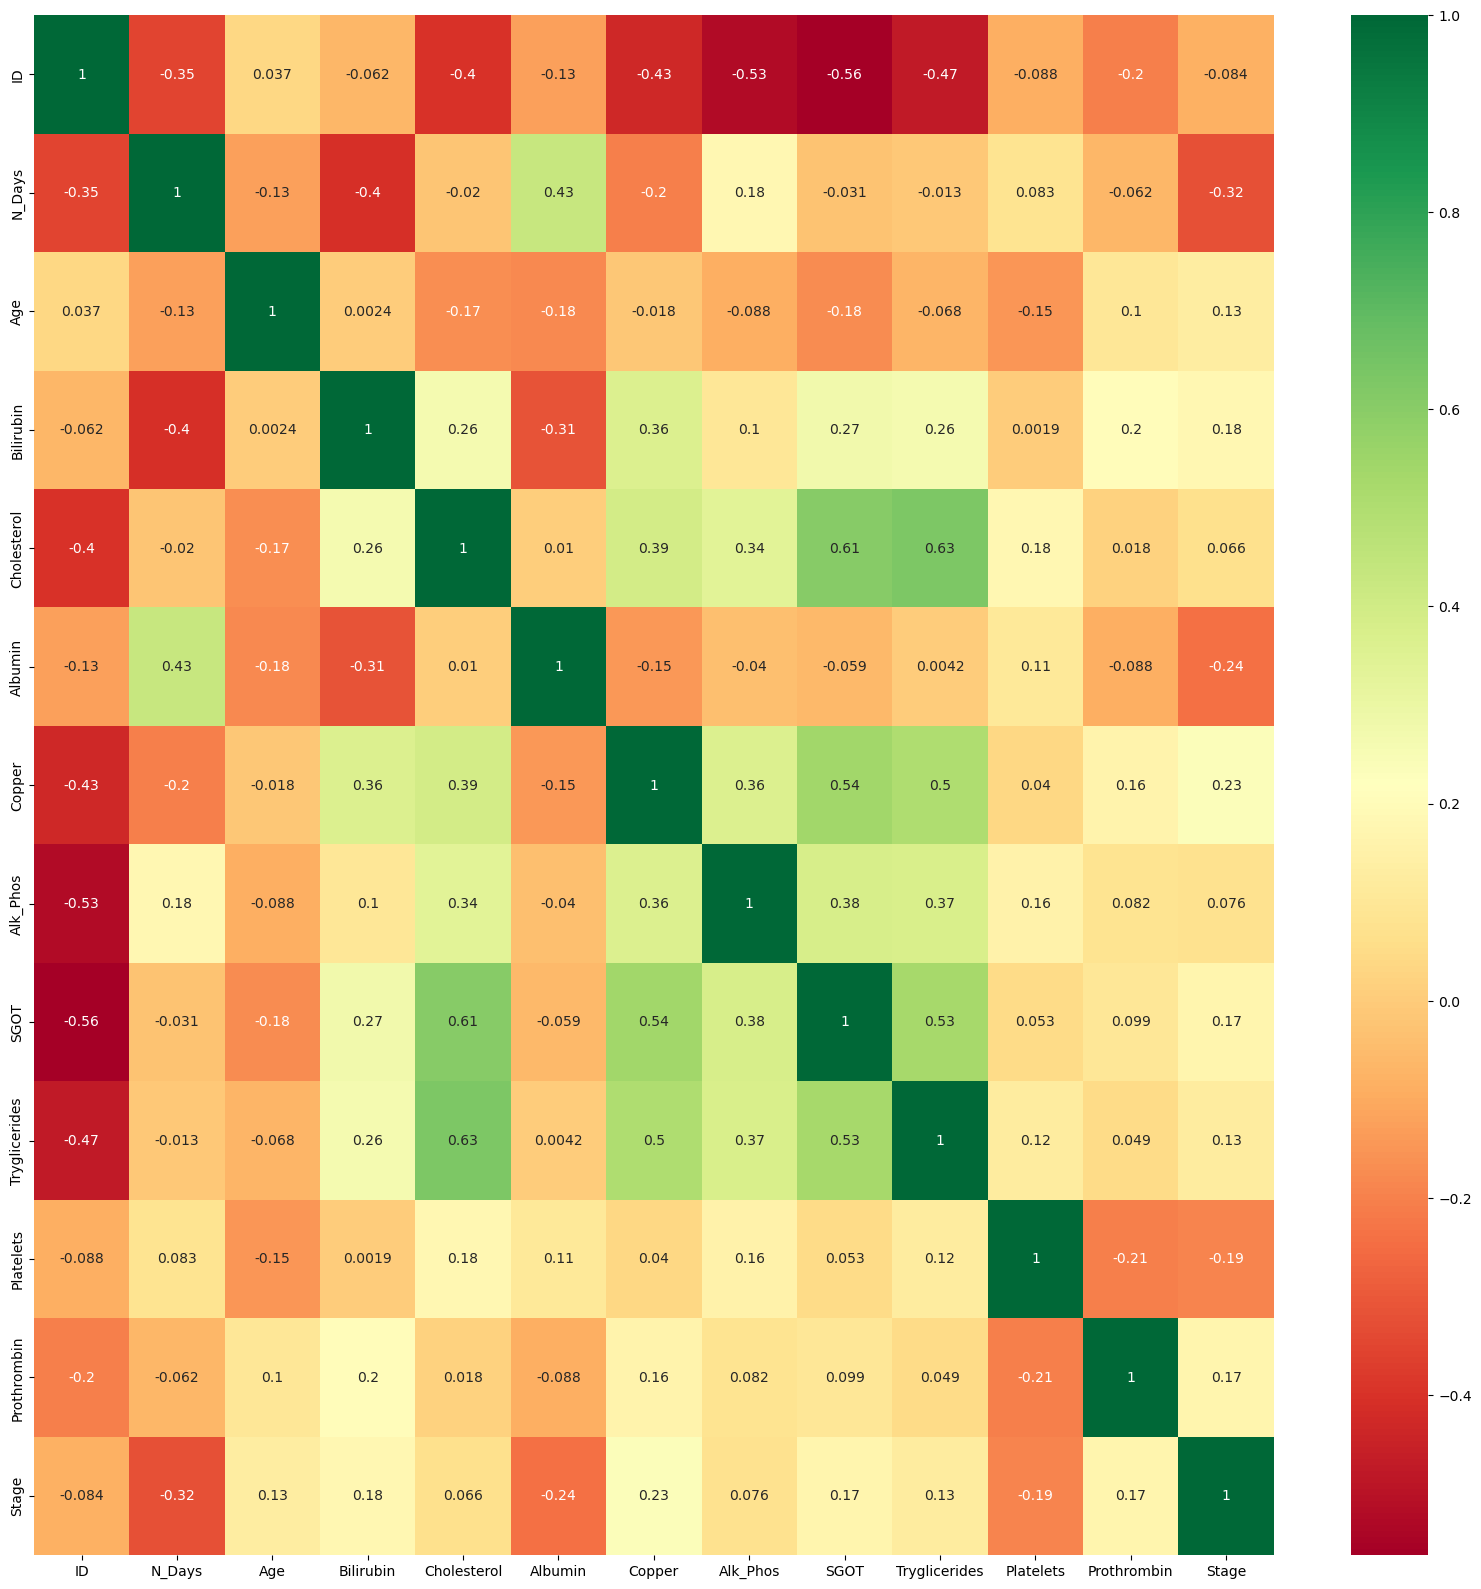

In [45]:
numeric_data = data.select_dtypes(include='number')
korelasi = numeric_data.corr()

# Rest of your code for creating heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

features = korelasi.index
plt.figure(figsize=(20, 20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")

In [46]:
#Show corellation in tables
numeric_data.corr()

ID    N_Days       Age  Bilirubin  Cholesterol   Albumin  \
ID             1.000000 -0.354305  0.037136  -0.062154    -0.399225 -0.128924   
N_Days        -0.354305  1.000000 -0.125934  -0.403953    -0.019573  0.430829   
Age            0.037136 -0.125934  1.000000   0.002362    -0.170107 -0.182350   
Bilirubin     -0.062154 -0.403953  0.002362   1.000000     0.262605 -0.314177   
Cholesterol   -0.399225 -0.019573 -0.170107   0.262605     1.000000  0.010295   
Albumin       -0.128924  0.430829 -0.182350  -0.314177     0.010295  1.000000   
Copper        -0.432502 -0.203698 -0.018408   0.359353     0.393257 -0.145252   
Alk_Phos      -0.525241  0.177073 -0.087745   0.099893     0.338007 -0.039811   
SGOT          -0.562636 -0.031378 -0.176089   0.274044     0.607532 -0.058910   
Tryglicerides -0.471127 -0.013113 -0.068263   0.263694     0.629484  0.004185   
Platelets     -0.087757  0.082762 -0.151694   0.001870     0.179738  0.106198   
Prothrombin   -0.204717 -0.062312  0.102427   0.204709     0.018110 -0.088227   
Stage         -0.084233 -0.320953  0.128408   0.181879     0.066303 -0.240563   

                 Copper  Alk_Phos      SGOT  Tryglicerides  Platelets  \
ID            -0.432502 -0.525241 -0.562636      -0.471127  -0.087757   
N_Days        -0.203698  0.177073 -0.031378      -0.013113   0.082762   
Age           -0.018408 -0.087745 -0.176089      -0.068263  -0.151694   
Bilirubin      0.359353  0.099893  0.274044       0.263694   0.001870   
Cholesterol    0.393257  0.338007  0.607532       0.629484   0.179738   
Albumin       -0.145252 -0.039811 -0.058910       0.004185   0.106198   
Copper         1.000000  0.359882  0.538113       0.500773   0.039789   
Alk_Phos       0.359882  1.000000  0.381641       0.371835   0.155858   
SGOT           0.538113  0.381641  1.000000       0.529231   0.053015   
Tryglicerides  0.500773  0.371835  0.529231       1.000000   0.124524   
Platelets      0.039789  0.155858  0.053015       0.124524   1.000000   
Prothrombin    0.159292  0.081869  0.099085       0.048925  -0.205662   
Stage          0.232272  0.076157  0.167726       0.125037  -0.194816   

               Prothrombin     Stage  
ID               -0.204717 -0.084233  
N_Days           -0.062312 -0.320953  
Age               0.102427  0.128408  
Bilirubin         0.204709  0.181879  
Cholesterol       0.018110  0.066303  
Albumin          -0.088227 -0.240563  
Copper            0.159292  0.232272  
Alk_Phos          0.081869  0.076157  
SGOT              0.099085  0.167726  
Tryglicerides     0.048925  0.125037  
Platelets        -0.205662 -0.194816  
Prothrombin       1.000000  0.166475  
Stage             0.166475  1.000000

In [47]:
#statistika dasar
data.describe()

ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   418.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   250.734450   
std    120.810458  1104.672992   3815.845055    4.407506   257.841657   
min      1.000000    41.000000   9598.000000    0.300000    -1.000000   
25%    105.250000  1092.750000  15644.500000    0.800000    -1.000000   
50%    209.500000  1730.000000  18628.000000    1.400000   252.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   347.750000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  418.000000    418.000000  418.000000     418.000000   
mean     3.497440   72.160287   1479.623445   91.223876      83.803828   
std      0.424972   85.443437   2040.419040   72.761026      79.603693   
min      1.960000   -1.000000     -1.000000   -1.000000      -1.000000   
25%      3.242500   -1.000000     -1.000000   -1.000000      -1.000000   
50%      3.530000   50.500000   1009.000000   90.450000      85.000000   
75%      3.770000  100.750000   1707.750000  135.750000     127.750000   
max      4.640000  588.000000  13862.400000  457.250000     598.000000   

        Platelets  Prothrombin       Stage  
count  418.000000   418.000000  418.000000  
mean   250.234450    10.675598    2.966507  
std    105.465134     1.302471    0.998237  
min     -1.000000    -1.000000   -1.000000  
25%    181.000000    10.000000    2.000000  
50%    248.000000    10.600000    3.000000  
75%    315.500000    11.100000    4.000000  
max    721.000000    18.000000    4.000000

In [48]:
#checking skewness dari data
cirhossis_true_count =len(data.loc[data['Stage']==1])
cirhossis_false_count = len(data.loc[data['Stage']==0])

In [49]:
#view
(cirhossis_true_count,cirhossis_false_count)

(21, 0)

In [50]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 418
total number of columns : 13


In [51]:
data.columns

Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [52]:
print('Banyak baris nilai nol untuk n_days :{0}'.format(len(data.loc[data['N_Days']==0])))
print('Banyak baris nilai nol untuk age :{0}'.format(len(data.loc[data['Age']==0])))
print('Banyak baris nilai nol untuk bilirubin :{0}'.format(len(data.loc[data['Bilirubin']==0])))
print('Banyak baris nilai nol untuk cholesterol :{0}'.format(len(data.loc[data['Cholesterol']==0])))
print('Banyak baris nilai nol untuk albumin :{0}'.format(len(data.loc[data['Albumin']==0])))
print('Banyak baris nilai nol untuk copper :{0}'.format(len(data.loc[data['Copper']==0])))
print('Banyak baris nilai nol untuk alk_phos :{0}'.format(len(data.loc[data['Alk_Phos']==0])))
print('Banyak baris nilai nol untuk sgot :{0}'.format(len(data.loc[data['SGOT']==0])))
print('Banyak baris nilai nol untuk tryglicerides :{0}'.format(len(data.loc[data['Tryglicerides']==0])))
print('Banyak baris nilai nol untuk platelets :{0}'.format(len(data.loc[data['Platelets']==0])))
print('Banyak baris nilai nol untuk prothrombin :{0}'.format(len(data.loc[data['Prothrombin']==0])))
print('Banyak baris nilai nol untuk stage :{0}'.format(len(data.loc[data['Stage']==0])))


Banyak baris nilai nol untuk n_days :0
Banyak baris nilai nol untuk age :0
Banyak baris nilai nol untuk bilirubin :0
Banyak baris nilai nol untuk cholesterol :0
Banyak baris nilai nol untuk albumin :0
Banyak baris nilai nol untuk copper :0
Banyak baris nilai nol untuk alk_phos :0
Banyak baris nilai nol untuk sgot :0
Banyak baris nilai nol untuk tryglicerides :0
Banyak baris nilai nol untuk platelets :0
Banyak baris nilai nol untuk prothrombin :0
Banyak baris nilai nol untuk stage :0


In [53]:
data2 = data.copy()

In [54]:
#rata-rata
avg_n_days = data2['N_Days'].mean()
avg_age = data2['Age'].mean()
avg_bilirubin = data2['Bilirubin'].mean()
avg_cholesterol = data2['Cholesterol'].mean()
avg_albumin = data2['Albumin'].mean()

In [55]:
#now replace avg to columns 
data2['N_Days'].replace({0:avg_n_days},inplace=True)
data2['Age'].replace({0:avg_age},inplace=True)
data2['Bilirubin'].replace({0:avg_bilirubin},inplace=True)
data2['Cholesterol'].replace({0:avg_cholesterol},inplace=True)
data2['Albumin'].replace({0:avg_albumin},inplace=True)

In [56]:
print('Banyak baris nilai nol untuk id :{0}'.format(len(data2.loc[data2['ID']==0])))
print('Banyak baris nilai nol untuk n_days :{0}'.format(len(data2.loc[data2['N_Days']==0])))
print('Banyak baris nilai nol untuk age :{0}'.format(len(data2.loc[data2['Age']==0])))
print('Banyak baris nilai nol untuk bilirubin :{0}'.format(len(data2.loc[data2['Bilirubin']==0])))
print('Banyak baris nilai nol untuk cholesterol :{0}'.format(len(data2.loc[data2['Cholesterol']==0])))
print('Banyak baris nilai nol untuk albumin :{0}'.format(len(data2.loc[data2['Albumin']==0])))
print('Banyak baris nilai nol untuk copper :{0}'.format(len(data2.loc[data2['Copper']==0])))
print('Banyak baris nilai nol untuk alk_phos :{0}'.format(len(data2.loc[data2['Alk_Phos']==0])))
print('Banyak baris nilai nol untuk sgot :{0}'.format(len(data2.loc[data2['SGOT']==0])))
print('Banyak baris nilai nol untuk tryglicerides :{0}'.format(len(data2.loc[data2['Tryglicerides']==0])))
print('Banyak baris nilai nol untuk platelets :{0}'.format(len(data2.loc[data2['Platelets']==0])))
print('Banyak baris nilai nol untuk prothrombin :{0}'.format(len(data2.loc[data2['Prothrombin']==0])))
print('Banyak baris nilai nol untuk stage :{0}'.format(len(data2.loc[data2['Stage']==0])))


Banyak baris nilai nol untuk id :0
Banyak baris nilai nol untuk n_days :0
Banyak baris nilai nol untuk age :0
Banyak baris nilai nol untuk bilirubin :0
Banyak baris nilai nol untuk cholesterol :0
Banyak baris nilai nol untuk albumin :0
Banyak baris nilai nol untuk copper :0
Banyak baris nilai nol untuk alk_phos :0
Banyak baris nilai nol untuk sgot :0
Banyak baris nilai nol untuk tryglicerides :0
Banyak baris nilai nol untuk platelets :0
Banyak baris nilai nol untuk prothrombin :0
Banyak baris nilai nol untuk stage :0


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

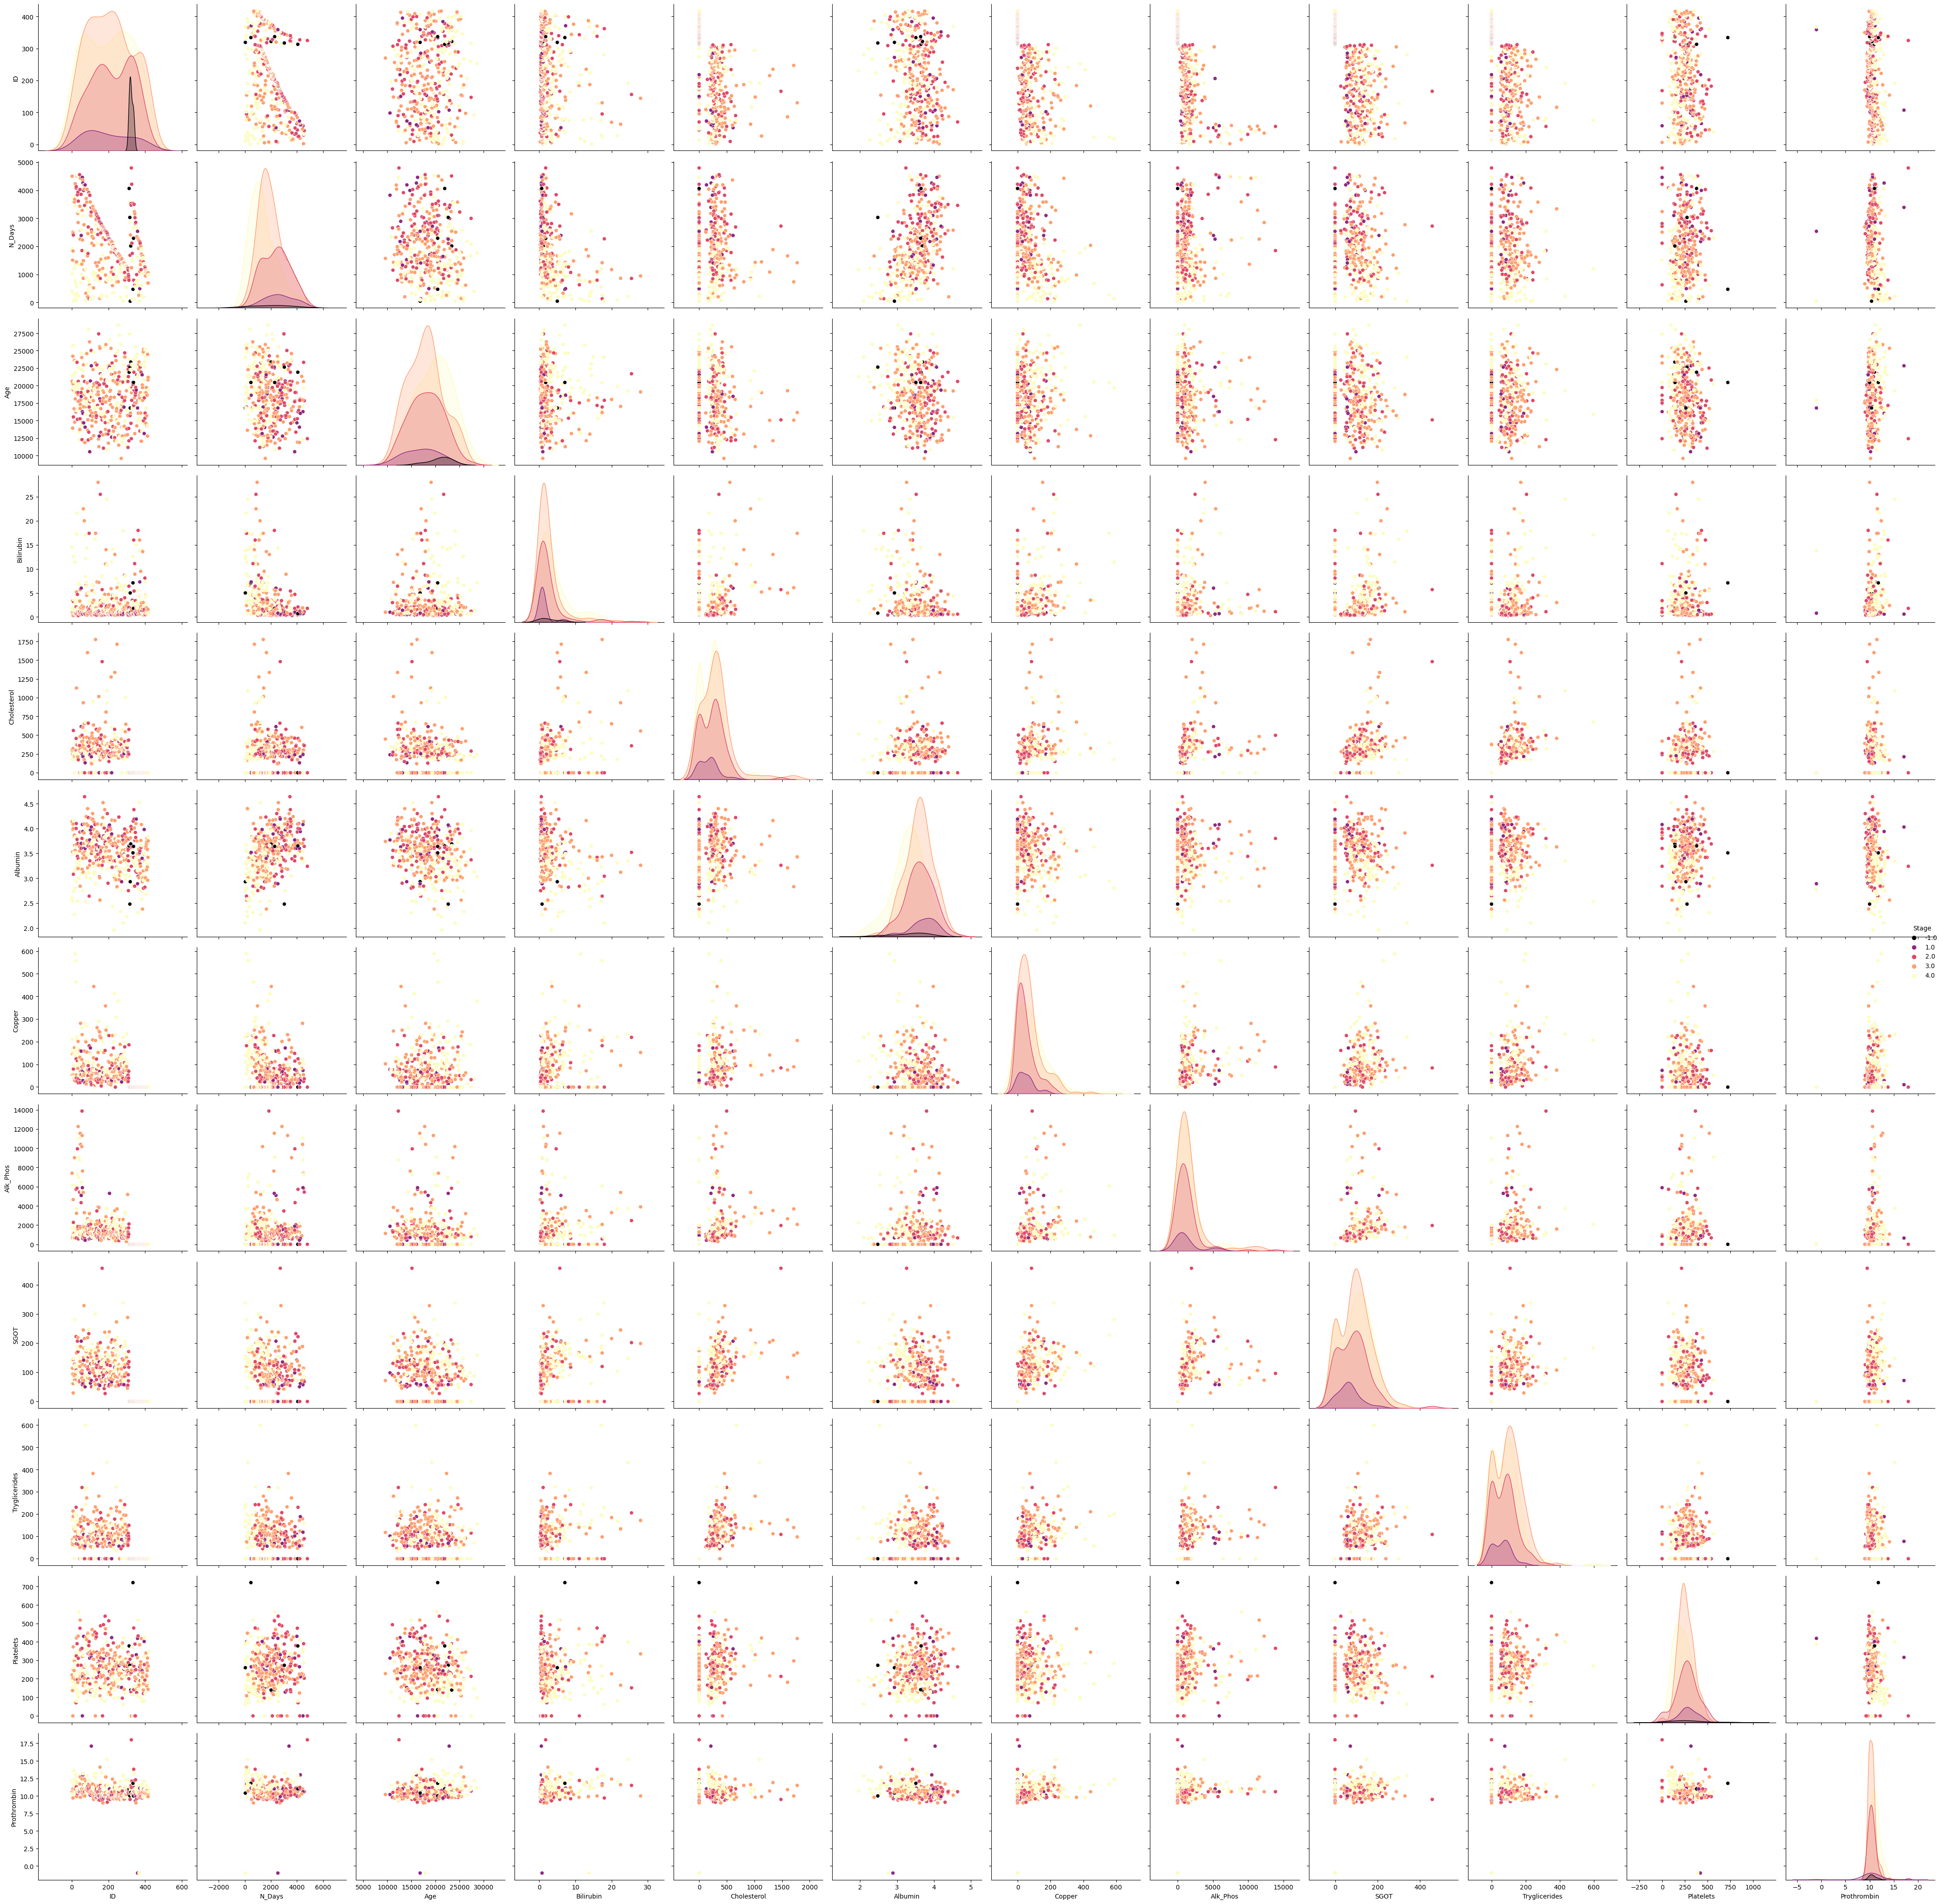

In [57]:
#make pairplot
sns.pairplot(data2,hue='Stage',palette='magma',height=3.5)
plt.tight_layout()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

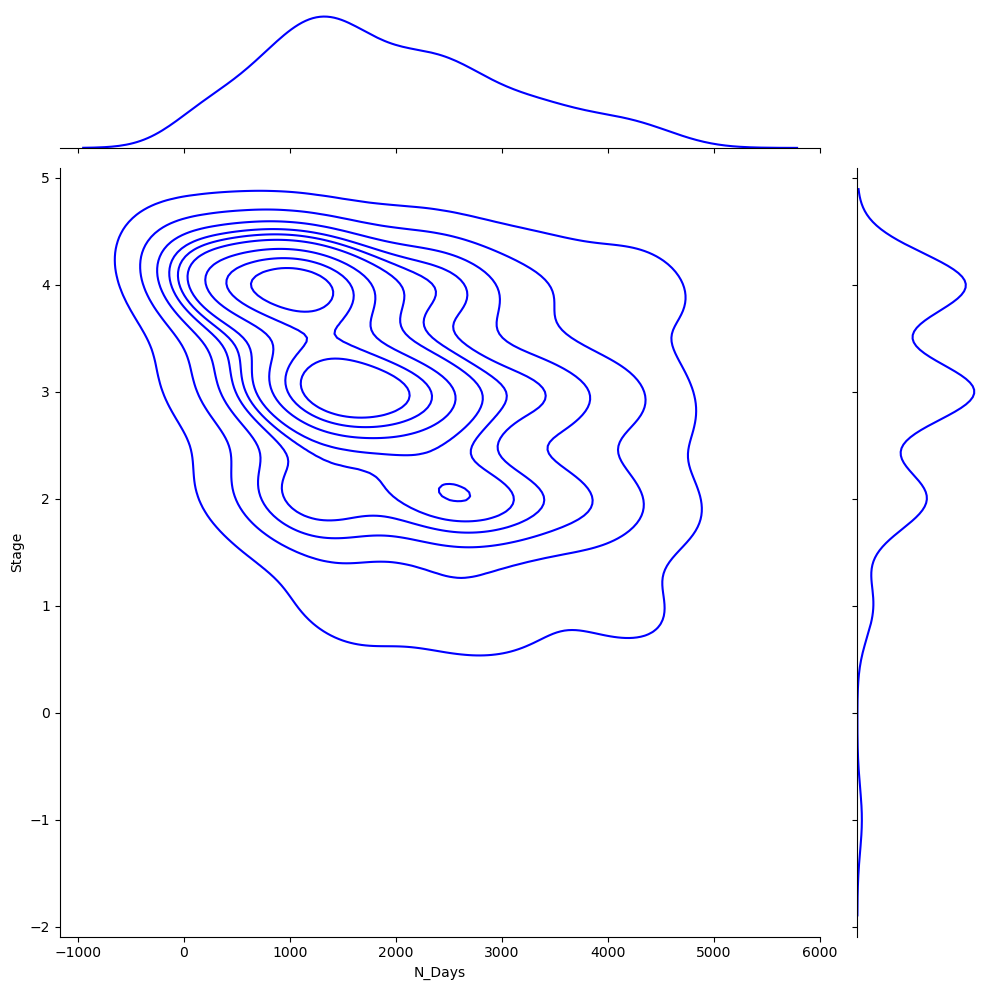

In [58]:
#joinplot
sns.jointplot(x='N_Days',y='Stage',data=data2,height=10,kind='kde',color='blue')
plt.tight_layout()

#apply Model

In [59]:
from sklearn.model_selection import train_test_split

X = data2.drop('Stage',axis=1)
y = data2['Stage']

In [60]:
X

ID  N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0      1     400  21464       14.5        261.0     2.60   156.0    1718.0   
1      2    4500  20617        1.1        302.0     4.14    54.0    7394.8   
2      3    1012  25594        1.4        176.0     3.48   210.0     516.0   
3      4    1925  19994        1.8        244.0     2.54    64.0    6121.8   
4      5    1504  13918        3.4        279.0     3.53   143.0     671.0   
..   ...     ...    ...        ...          ...      ...     ...       ...   
413  414     681  24472        1.2         -1.0     2.96    -1.0      -1.0   
414  415    1103  14245        0.9         -1.0     3.83    -1.0      -1.0   
415  416    1055  20819        1.6         -1.0     3.42    -1.0      -1.0   
416  417     691  21185        0.8         -1.0     3.75    -1.0      -1.0   
417  418     976  19358        0.7         -1.0     3.29    -1.0      -1.0   

       SGOT  Tryglicerides  Platelets  Prothrombin  
0    137.95          172.0      190.0         12.2  
1    113.52           88.0      221.0         10.6  
2     96.10           55.0      151.0         12.0  
3     60.63           92.0      183.0         10.3  
4    113.15           72.0      136.0         10.9  
..      ...            ...        ...          ...  
413   -1.00           -1.0      174.0         10.9  
414   -1.00           -1.0      180.0         11.2  
415   -1.00           -1.0      143.0          9.9  
416   -1.00           -1.0      269.0         10.4  
417   -1.00           -1.0      350.0         10.6  

[418 rows x 12 columns]

In [61]:
y

0      4.0
1      3.0
2      4.0
3      4.0
4      3.0
      ... 
413    3.0
414    4.0
415    3.0
416    3.0
417    4.0
Name: Stage, Length: 418, dtype: float64

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [63]:
X_train

ID  N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
336  337    2286  20454        1.8         -1.0     3.64    -1.0      -1.0   
31    32    4523  19722        1.8        262.0     3.34   101.0    7277.0   
84    85    3358  17246        2.1        262.0     3.48    58.0    2045.0   
287  288    1067  17874        8.7        310.0     3.89   107.0     637.0   
317  318    1680  15706        0.7         -1.0     3.68    -1.0      -1.0   
..   ...     ...    ...        ...          ...      ...     ...       ...   
71    72    4184  11868        0.5        320.0     3.54    51.0    1243.0   
106  107    3388  22836        0.6        212.0     4.03    10.0     648.0   
270  271    1569  18435        1.0        321.0     3.50    94.0     955.0   
348  349    2855  19724        1.4         -1.0     3.82    -1.0      -1.0   
102  103     110  17884        2.5        188.0     3.67    57.0    1273.0   

       SGOT  Tryglicerides  Platelets  Prothrombin  
336   -1.00           -1.0      141.0         10.0  
31    82.56          158.0      286.0         10.6  
84    89.90           84.0      225.0         11.5  
287  117.00          242.0      298.0          9.6  
317   -1.00           -1.0      306.0          9.5  
..      ...            ...        ...          ...  
71   122.45           80.0      225.0         10.0  
106   71.30           77.0      316.0         17.1  
270  111.00          177.0      289.0          9.7  
348   -1.00           -1.0      249.0         10.3  
102  119.35          102.0      110.0         11.1  

[334 rows x 12 columns]

In [64]:
X_train.shape

(334, 12)

In [65]:
y_train.shape

(334,)

In [66]:
X_test

ID  N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
321  322    2011  23376        1.1         -1.0     3.69    -1.0      -1.0   
324  325    4795  12419        1.8         -1.0     3.24    -1.0      -1.0   
388  389    1581  24472        0.7         -1.0     3.06    -1.0      -1.0   
56    57    3282  19567        2.3        260.0     3.18   231.0   11320.2   
153  154     140  25340        2.4        168.0     2.56   225.0    1056.0   
..   ...     ...    ...        ...          ...      ...     ...       ...   
57    58    4459  16279        0.7        242.0     4.08    73.0    5890.0   
126  127    3255  16109        0.5        268.0     4.08     9.0    1174.0   
24    25    4127  16463        0.7        298.0     4.10    40.0     661.0   
17    18     131  19698       11.4        178.0     2.80   588.0     961.0   
66    67    2769  18733        1.1        466.0     3.91    84.0    1787.0   

       SGOT  Tryglicerides  Platelets  Prothrombin  
321   -1.00           -1.0      139.0         10.5  
324   -1.00           -1.0       -1.0         18.0  
388   -1.00           -1.0      165.0         10.0  
56   105.78           94.0      216.0         12.4  
153  120.90           75.0      108.0         14.1  
..      ...            ...        ...          ...  
57    56.76          118.0       -1.0         10.6  
126   86.80           95.0      453.0         10.0  
24   106.95           66.0      324.0         11.3  
17   280.55          200.0      283.0         12.4  
66   328.60          185.0      261.0         10.0  

[84 rows x 12 columns]

In [67]:
y_train


336   -1.0
31     4.0
84     4.0
287    2.0
317    2.0
      ... 
71     3.0
106    1.0
270    3.0
348    2.0
102    4.0
Name: Stage, Length: 334, dtype: float64

In [68]:
# Membuat model Random Forest dan melatihnya
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Memprediksi data uji
predictions = rf_classifier.predict(X_test)


In [70]:
# Evaluasi model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, predictions))

Accuracy: 0.55
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         3
         2.0       0.38      0.19      0.25        16
         3.0       0.50      0.72      0.59        32
         4.0       0.67      0.65      0.66        31

    accuracy                           0.55        84
   macro avg       0.31      0.31      0.30        84
weighted avg       0.51      0.55      0.51        84



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##training

In [71]:
from sklearn.svm import SVC

SVC_model = SVC()

In [72]:
SVC_model.fit(X_train,y_train)






SVC()

In [73]:
svc_prediction = SVC_model.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,svc_prediction))

[[ 0  0  0  0  2]
 [ 0  0  0  3  0]
 [ 0  0  0 13  3]
 [ 0  0  0 22 10]
 [ 0  0  0 14 17]]


In [75]:
print(classification_report(y_test,svc_prediction))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00        16
         3.0       0.42      0.69      0.52        32
         4.0       0.53      0.55      0.54        31

    accuracy                           0.46        84
   macro avg       0.19      0.25      0.21        84
weighted avg       0.36      0.46      0.40        84



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Save Model

In [77]:
import pickle

pickle.dump(SVC_model,open('SVC.pkl','wb'))